## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve, confusion_matrix, ConfusionMatrixDisplay

## Context
Each column in the dataset is a question that was asked to 150 couples and here is what they are:
* Q1 If one of us apologizes when our discussion deteriorates, the discussion ends.
* Q2 I know we can ignore our differences, even if things get hard sometimes.
* Q3 When we need it, we can take our discussions with my spouse from the beginning and correct it.
* Q4 When I discuss with my spouse, to contact him will eventually work.
* Q5 The time I spent with my wife is special for us.
* Q6 We don't have time at home as partners.
* Q7 We are like two strangers who share the same environment at home rather than family.
* Q8 I enjoy our holidays with my wife.
* Q9 I enjoy traveling with my wife.
* Q10 Most of our goals are common to my spouse.
* Q11 I think that one day in the future, when I look back, I see that my spouse and I have been in harmon...
* Q12 My spouse and I have similar values in terms of personal freedom.
* Q13 My spouse and I have similar sense of entertainment.
* Q14 Most of our goals for people (children, friends, etc.) are the same.
* Q15 Our dreams with my spouse are similar and harmonious.
* Q16 We're compatible with my spouse about what love should be.
* Q17 We share the same views about being happy in our life with my spouse
* Q18 My spouse and I have similar ideas about how marriage should be
* Q19 My spouse and I have similar ideas about how roles should be in marriage
* Q20 My spouse and I have similar values in trust.
* Q21 I know exactly what my wife likes.
* Q22 I know how my spouse wants to be taken care of when she/he sick.
* Q23 I know my spouse's favorite food.
* Q24 I can tell you what kind of stress my spouse is facing in her/his life.
* Q25 I have knowledge of my spouse's inner world.
* Q26 I know my spouse's basic anxieties.
* Q27 I know what my spouse's current sources of stress are.
* Q28 I know my spouse's hopes and wishes.
* Q29 I know my spouse very well.
* Q30 I know my spouse's friends and their social relationships.
* Q31 I feel aggressive when I argue with my spouse.
* Q32 When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
* Q33 I can use negative statements about my spouse's personality during our discussions.
* Q34 I can use offensive expressions during our discussions.
* Q35 I can insult my spouse during our discussions.
* Q36 I can be humiliating when we discussions.
* Q37 My discussion with my spouse is not calm.
* Q38 I hate my spouse's way of open a subject.
* Q39 Our discussions often occur suddenly.
* Q40 We're just starting a discussion before I know what's going on.
* Q41 When I talk to my spouse about something, my calm suddenly breaks.
* Q42 When I argue with my spouse, ı only go out and I don't say a word.
* Q43 I mostly stay silent to calm the environment a little bit.
* Q44 Sometimes I think it's good for me to leave home for a while.
* Q45 I'd rather stay silent than discuss with my spouse.
* Q46 Even if I'm right in the discussion, I stay silent to hurt my spouse.
* Q47 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my ang...
* Q48 I feel right in our discussions.
* Q49 I have nothing to do with what I've been accused of.
* Q50 I'm not actually the one who's guilty about what I'm accused of.
* Q51 I'm not the one who's wrong about problems at home.
* Q52 I wouldn't hesitate to tell my spouse about her/his inadequacy.
* Q53 When I discuss, I remind my spouse of her/his inadequacy.
* Q54 I'm not afraid to tell my spouse about her/his incompetence.

The values in each column represent the answers that the couples gave, here is what each number means:
* All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

Our goal is to use these answers to predict if the couple will get divorced or not

## Read / Analysis


In [2]:
df = pd.read_csv('/kaggle/input/divorce-prediction/divorce_data.csv', sep = ';')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


<AxesSubplot:xlabel='Divorce', ylabel='count'>

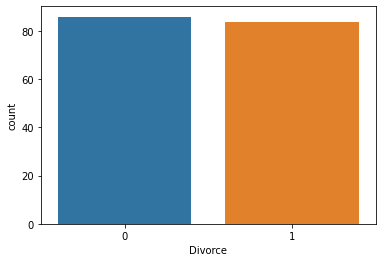

In [3]:
sns.countplot(x = df['Divorce'])

### The dataset is very balanced, with the target being almost an exact 50 / 50

In [4]:
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
Q1,1.00,0.82,0.83,0.83,0.88,0.29,0.43,0.80,0.85,0.79,0.89,0.79,0.84,0.82,0.85,0.83,0.90,0.85,0.90,0.84,0.82,0.79,0.82,0.81,0.82,0.80,0.83,0.76,0.86,0.79,0.70,0.74,0.80,0.75,0.80,0.81,0.79,0.80,0.82,0.84,0.80,0.64,0.48,0.75,0.51,0.40,0.58,0.63,0.67,0.73,0.68,0.58,0.61,0.77,0.86
Q2,0.82,1.00,0.81,0.79,0.82,0.10,0.42,0.86,0.83,0.78,0.82,0.86,0.79,0.88,0.80,0.81,0.82,0.88,0.83,0.88,0.79,0.80,0.77,0.87,0.77,0.86,0.82,0.78,0.79,0.84,0.66,0.74,0.76,0.71,0.75,0.78,0.75,0.75,0.79,0.79,0.78,0.65,0.50,0.70,0.49,0.39,0.62,0.64,0.66,0.68,0.64,0.54,0.61,0.73,0.82
Q3,0.83,0.81,1.00,0.81,0.80,0.26,0.46,0.76,0.82,0.75,0.81,0.78,0.76,0.75,0.81,0.78,0.81,0.80,0.80,0.81,0.80,0.73,0.71,0.74,0.72,0.73,0.80,0.69,0.76,0.75,0.65,0.75,0.73,0.70,0.73,0.74,0.74,0.74,0.76,0.78,0.74,0.57,0.39,0.66,0.43,0.31,0.54,0.64,0.65,0.66,0.60,0.49,0.60,0.67,0.81
Q4,0.83,0.79,0.81,1.00,0.82,0.19,0.47,0.80,0.83,0.87,0.81,0.79,0.75,0.76,0.79,0.88,0.81,0.84,0.83,0.82,0.78,0.84,0.74,0.78,0.74,0.76,0.77,0.83,0.78,0.77,0.66,0.75,0.76,0.73,0.77,0.79,0.76,0.79,0.76,0.80,0.77,0.64,0.45,0.71,0.45,0.34,0.55,0.63,0.70,0.69,0.62,0.53,0.59,0.70,0.82
Q5,0.88,0.82,0.80,0.82,1.00,0.30,0.38,0.88,0.92,0.82,0.94,0.85,0.92,0.85,0.88,0.85,0.95,0.89,0.94,0.89,0.87,0.84,0.89,0.83,0.89,0.84,0.88,0.81,0.93,0.84,0.79,0.83,0.88,0.83,0.88,0.89,0.86,0.85,0.87,0.87,0.86,0.74,0.61,0.80,0.59,0.47,0.72,0.66,0.76,0.80,0.74,0.66,0.72,0.84,0.89
Q6,0.29,0.10,0.26,0.19,0.30,1.00,0.42,0.18,0.30,0.27,0.34,0.21,0.31,0.22,0.32,0.31,0.38,0.25,0.37,0.23,0.27,0.22,0.25,0.19,0.29,0.20,0.28,0.25,0.31,0.27,0.25,0.32,0.29,0.28,0.28,0.29,0.28,0.30,0.30,0.35,0.33,0.23,0.17,0.34,0.09,0.13,0.21,0.20,0.20,0.22,0.18,0.21,0.26,0.29,0.42
Q7,0.43,0.42,0.46,0.47,0.38,0.42,1.00,0.41,0.52,0.50,0.43,0.51,0.37,0.49,0.49,0.57,0.46,0.54,0.47,0.54,0.41,0.38,0.25,0.45,0.29,0.44,0.44,0.35,0.35,0.45,0.33,0.44,0.40,0.33,0.35,0.37,0.43,0.40,0.48,0.50,0.45,0.33,0.15,0.43,0.20,0.07,0.25,0.31,0.29,0.33,0.35,0.24,0.31,0.35,0.54
Q8,0.80,0.86,0.76,0.80,0.88,0.18,0.41,1.00,0.92,0.83,0.89,0.89,0.84,0.89,0.87,0.87,0.88,0.94,0.87,0.92,0.86,0.86,0.85,0.90,0.81,0.88,0.85,0.82,0.86,0.90,0.72,0.76,0.82,0.78,0.83,0.85,0.80,0.82,0.80,0.82,0.82,0.70,0.56,0.76,0.54,0.43,0.68,0.59,0.67,0.73,0.69,0.66,0.71,0.81,0.87
Q9,0.85,0.83,0.82,0.83,0.92,0.30,0.52,0.92,1.00,0.85,0.91,0.87,0.87,0.87,0.95,0.89,0.92,0.93,0.92,0.90,0.91,0.85,0.85,0.85,0.84,0.85,0.90,0.82,0.88,0.85,0.75,0.80,0.84,0.81,0.85,0.87,0.84,0.85,0.85,0.88,0.85,0.74,0.59,0.81,0.58,0.43,0.69,0.61,0.71,0.76,0.71,0.65,0.70,0.81,0.91
Q10,0.79,0.78,0.75,0.87,0.82,0.27,0.50,0.83,0.85,1.00,0.86,0.85,0.82,0.80,0.85,0.92,0.84,0.87,0.84,0.85,0.79,0.86,0.75,0.80,0.79,0.80,0.80,0.85,0.79,0.80,0.70,0.76,0.76,0.74,0.76,0.78,0.78,0.80,0.78,0.82,0.78,0.67,0.46,0.72,0.44,0.34,0.56,0.55,0.66,0.67,0.62,0.51,0.59,0.70,0.83


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Divorce', axis=1),
                                                   df['Divorce'],
                                                   test_size = 0.25,
                                                   random_state=42)

## Models


In [6]:
model_svm = SVC(random_state=42).fit(x_train, y_train)

y_pred_svm = model_svm.predict(x_test)

In [7]:
model_kn = KNeighborsClassifier().fit(x_train, y_train)

y_pred_kn = model_kn.predict(x_test)

In [8]:
model_lr = LogisticRegression().fit(x_train, y_train)

y_pred_lr = model_lr.predict(x_test)

In [9]:
model_rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

In [10]:
model_gb = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [11]:
model_dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)

## Initial Evaluation of all models

In [12]:
print('Accuracy score SVM: {:.4f}' .format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score KN:  {:.4f}' .format(accuracy_score(y_test, y_pred_kn)))
print('Accuracy score LR:  {:.4f}' .format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score RF:  {:.4f}' .format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy score GB:  {:.4f}' .format(accuracy_score(y_test, y_pred_gb)))
print('Accuracy score DT:  {:.4f}' .format(accuracy_score(y_test, y_pred_dt)))

Accuracy score SVM: 0.9767
Accuracy score KN:  0.9767
Accuracy score LR:  1.0000
Accuracy score RF:  0.9767
Accuracy score GB:  0.9535
Accuracy score DT:  0.8605


## Evaluation of the best model ( Logistic Regression )

In [13]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



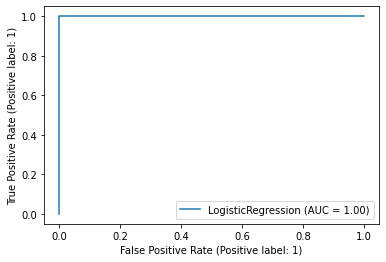

In [14]:
plot_roc_curve(model_lr, x_test, y_test)

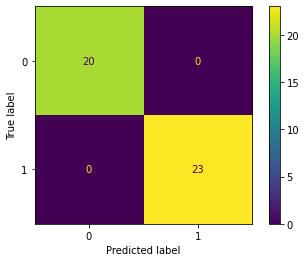

In [15]:
predictions = model_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr, labels = model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_lr.classes_)
disp.plot()
plt.show()